# Online Payments Fraud Detection with Machine Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print('Libraries imported sucessfully')

Libraries imported sucessfully


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.rcParams['axes.labelsize'] =10
plt.rcParams['axes.titlesize'] = 12

### Loading the data

In [4]:
df = pd.read_csv('Credit_card.csv')

In [5]:
# First 5 rows
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
# Check shape
df.shape

(6362620, 11)

In [7]:
# Check file summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
# Check describe
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [9]:
# Check duplicates
df.duplicated().sum()

0

In [10]:
# Check missing value
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
# Check last 5 rows
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


### EDA

In [12]:
# Check type of transactions
df.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

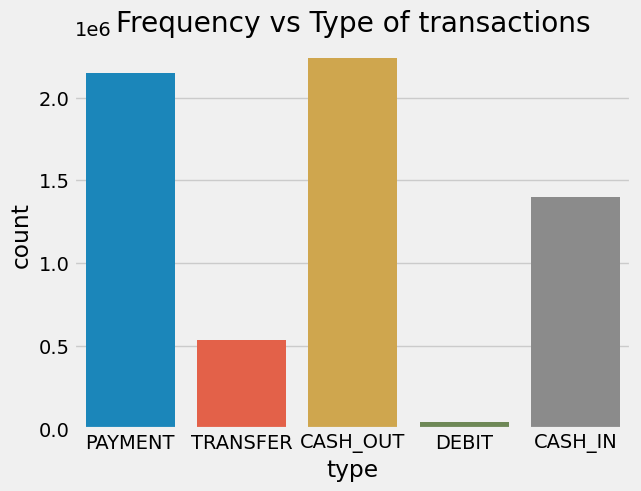

In [16]:
# Check countplot
sns.countplot(data=df,x='type')
plt.title('Frequency vs Type of transactions')
plt.show()

I the above debit very less trasactions and cash_out has highest trasactions respectively

Text(0.5, 1.0, 'Type distribution')

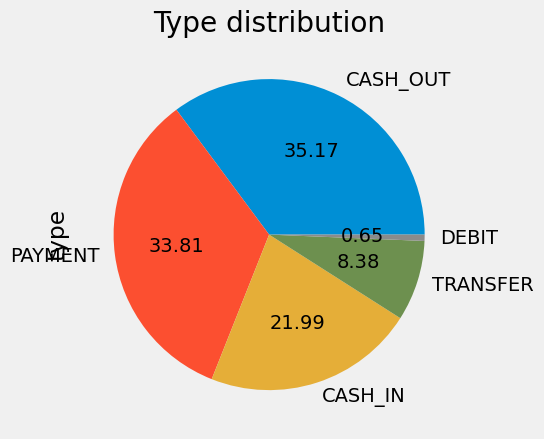

In [20]:
df.type.value_counts().plot(kind='pie',autopct='%1.2f')
plt.title('Type distribution')

In [21]:
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

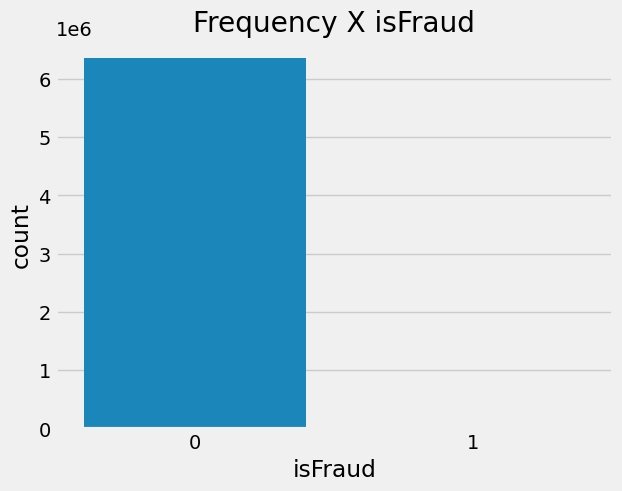

In [22]:
sns.countplot(data=df,x='isFraud')
plt.title('Frequency X isFraud')
plt.show()

<AxesSubplot:ylabel='isFraud'>

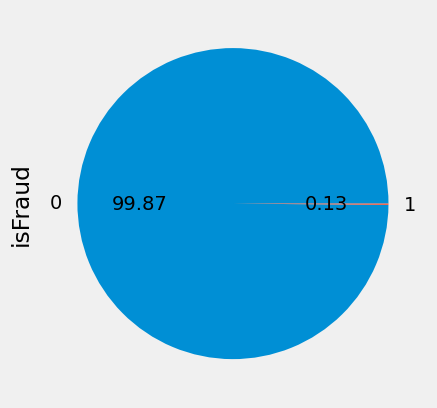

In [24]:
df.isFraud.value_counts().plot(kind='pie',autopct='%1.2f')

Only 0.13% trasactions are fraud

<AxesSubplot:xlabel='type', ylabel='count'>

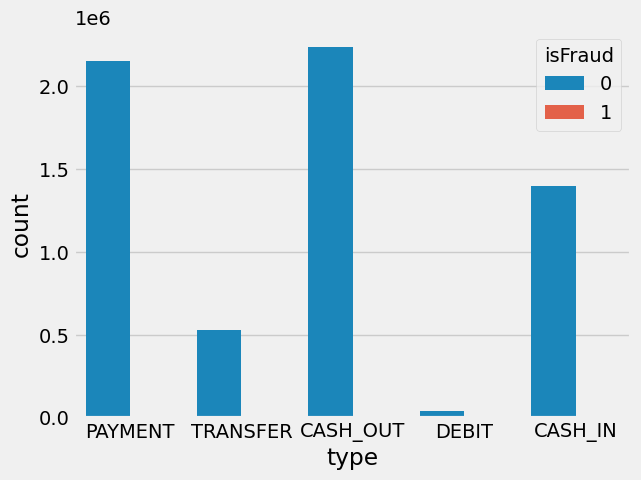

In [26]:
sns.countplot(data=df,x='type',hue='isFraud')

In [27]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder

In [28]:
lb = LabelEncoder()

In [30]:
a = lb.fit_transform(df['type'])

In [31]:
lb.classes_

array(['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER'],
      dtype=object)

In [32]:
df['type'] = a

In [33]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [37]:
# Spiltting the data
from sklearn.model_selection import train_test_split

In [38]:
# Input
X = df.loc[:,['type','amount','oldbalanceOrg','newbalanceOrig']]
X.head()

,type,amount,oldbalanceOrg,newbalanceOrig
0,3,9839.64,170136.0,160296.36
1,3,1864.28,21249.0,19384.72
2,4,181.00,181.0,0.00
3,1,181.00,181.0,0.00
4,3,11668.14,41554.0,29885.86


In [39]:
# output
y = df.isFraud
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

### Traing data

In [41]:
len(X_train)

5090096

In [42]:
len(y_train)

5090096

### Testing data

In [43]:
len(X_test)

1272524

In [44]:
len(y_test)

1272524

### Apply the ML

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
lr = LogisticRegression()

### Training phase

In [47]:
lr.fit(X_train,y_train)

LogisticRegression()

In [48]:
# Checking traing score
lr.score(X_train,y_train)*100

99.94809528150354

### Testing phase

In [50]:
# Predicted result
y_pred = lr.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
# Actual resulr
y_test

1530835    0
2895932    0
3451446    0
3779596    0
4910836    0
          ..
573062     0
3019121    0
2308188    0
5137460    0
6317185    0
Name: isFraud, Length: 1272524, dtype: int64

### Performance matrics

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1270216,     623],
       [     42,    1643]], dtype=int64)

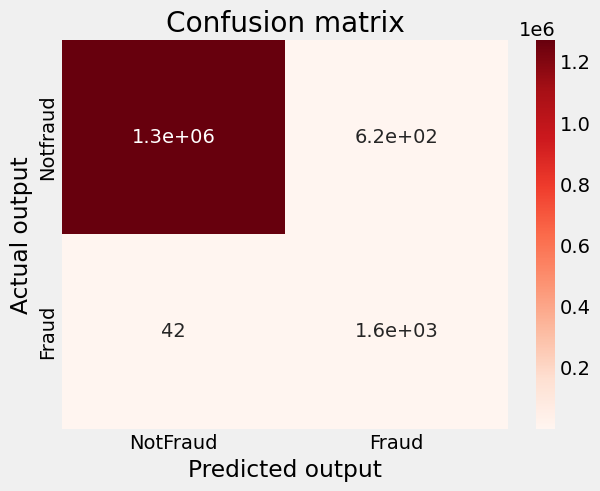

In [55]:
sns.heatmap(data=cm,cmap='Reds',annot=True,xticklabels=['NotFraud','Fraud'],yticklabels=['Notfraud','Fraud'])
plt.title('Confusion matrix')
plt.xlabel('Predicted output')
plt.ylabel('Actual output')
plt.show()

In [61]:
from sklearn.metrics import precision_score,recall_score,f1_score,classification_report,accuracy_score

In [59]:
# Precision
precision_score(y_test,y_pred)

0.7250661959399823

In [60]:
#Recall score
recall_score(y_test,y_pred)

0.9750741839762611

In [62]:
# Accuracy
accuracy_score(y_test,y_pred)

0.9994774165359553

In [63]:
# F1score
f1_score(y_test,y_pred)

0.8316881802075423

In [65]:
# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270839
           1       0.73      0.98      0.83      1685

    accuracy                           1.00   1272524
   macro avg       0.86      0.99      0.92   1272524
weighted avg       1.00      1.00      1.00   1272524

